/home/saarthakkapse/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Epoch: 1/150..  Training Loss: 0.746..  Valid Loss: 0.676..  Valid Accuracy: 0.562.. 
Epoch: 2/150..  Training Loss: 0.686..  Valid Loss: 0.645..  Valid Accuracy: 0.555.. 
Epoch: 3/150..  Training Loss: 0.690..  Valid Loss: 0.618..  Valid Accuracy: 0.625.. 
Epoch: 4/150..  Training Loss: 0.646..  Valid Loss: 0.570..  Valid Accuracy: 0.656.. 
Epoch: 5/150..  Training Loss: 0.629..  Valid Loss: 0.543..  Valid Accuracy: 0.700.. 
Epoch: 6/150..  Training Loss: 0.588..  Valid Loss: 0.519..  Valid Accuracy: 0.707.. 
Epoch: 7/150..  Training Loss: 0.556..  Valid Loss: 0.491..  Valid Accuracy: 0.741.. 
Epoch: 8/150..  Training Loss: 0.534..  Valid Loss: 0.442..  Valid Accuracy: 0.801.. 
Epoch: 9/150..  Training Loss: 0.498..  Valid Loss: 0.403..  Valid Accuracy: 0.814.. 
Epoch: 10/150..  Training Loss: 0.461..  Valid Loss: 0.384..  Valid Accuracy: 0.817.. 
Epoch: 11/150..  Training Loss: 0.460..  Valid Loss: 0.378..  Valid Accuracy: 0.830.. 
Epoch: 12/150..  Training Loss: 0.425..  Valid Loss:

Epoch: 96/150..  Training Loss: 0.134..  Valid Loss: 0.100..  Valid Accuracy: 0.962.. 
Epoch: 97/150..  Training Loss: 0.135..  Valid Loss: 0.096..  Valid Accuracy: 0.975.. 
Epoch: 98/150..  Training Loss: 0.131..  Valid Loss: 0.126..  Valid Accuracy: 0.962.. 
Epoch: 99/150..  Training Loss: 0.183..  Valid Loss: 0.119..  Valid Accuracy: 0.959.. 
Epoch: 100/150..  Training Loss: 0.148..  Valid Loss: 0.098..  Valid Accuracy: 0.968.. 
Epoch: 101/150..  Training Loss: 0.139..  Valid Loss: 0.100..  Valid Accuracy: 0.972.. 
Epoch: 102/150..  Training Loss: 0.143..  Valid Loss: 0.091..  Valid Accuracy: 0.972.. 
Epoch: 103/150..  Training Loss: 0.143..  Valid Loss: 0.096..  Valid Accuracy: 0.981.. 
Epoch: 104/150..  Training Loss: 0.122..  Valid Loss: 0.091..  Valid Accuracy: 0.975.. 
Epoch: 105/150..  Training Loss: 0.127..  Valid Loss: 0.104..  Valid Accuracy: 0.978.. 
Epoch: 106/150..  Training Loss: 0.155..  Valid Loss: 0.111..  Valid Accuracy: 0.965.. 
Epoch: 107/150..  Training Loss: 0.1

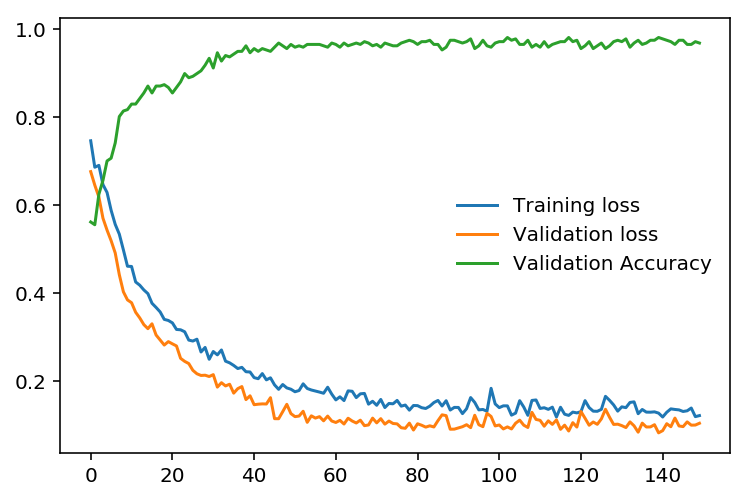

In [1]:
import torch 
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import utils
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

data = pd.read_csv('voice.csv') #loading data using panda 
male_data=data[data['label']=='male'] #partitioning male data from our original data voice.csv
female_data=data[data['label']=='female'] #partitioning female data from our original data voice.csv
male_data.loc[:,'label']=1  #converting label male to 1
female_data.loc[:,'label']=0 #converting label female to 0
data_with_label_1_0=pd.concat([male_data,female_data]) #combining male and female data again to make complete data again with label 0(female) and 1(male) 
data_with_label_1_0 = data_with_label_1_0.sample(frac=1).reset_index(drop=True) #shuffling our data randomly
size_of_data=data_with_label_1_0.shape[0] #total size of data
train_data_with_label_1_0=data_with_label_1_0.loc[:size_of_data*8.0/10,:] #taking 80% for train
valid_data_with_label_1_0=data_with_label_1_0.loc[size_of_data*8.0/10:size_of_data*9.0/10,:] #taking 10% for validation
test_data_with_label_1_0=data_with_label_1_0.loc[size_of_data*9.0/10:size_of_data,:] #taking 10% for test

 #converting our data from pandas to tensor
train_data_tensor = torch.tensor(train_data_with_label_1_0.values)
valid_data_tensor = torch.tensor(valid_data_with_label_1_0.values)
test_data_tensor = torch.tensor(test_data_with_label_1_0.values)

#making data loader for all train ,test and valid dataset and making batches for stochastic 
trainloader = torch.utils.data.DataLoader(train_data_tensor, batch_size=32, shuffle=False)
validloader = torch.utils.data.DataLoader(valid_data_tensor, batch_size=317, shuffle=False) # 317 is full size of valid_data_tensor
testloader = torch.utils.data.DataLoader(test_data_tensor, batch_size=316, shuffle=False)  # 316 is full size of test_data_tensor
#basically taking whole batch together for valid and test to speed up process

model = nn.Sequential(nn.Linear(20, 64),
                      nn.ReLU(),
                      nn.Dropout(p=0.25),
                      nn.Linear(64, 256),
                      nn.ReLU(),
                      nn.Dropout(p=0.25),
                      nn.Linear(256, 256),
                      nn.ReLU(),
                      nn.Dropout(p=0.25),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Dropout(p=0.25),
                      nn.Linear(64, 1),
                      nn.Sigmoid()
                      ) 
#our model consist of 4 hidden layer one output and one input , 20 units in input,64 in first hidden,256 in second,256 in third,64 in fourth and one unit in output layer 
#and finally passed through sigmoid to get output between 0 and 1 

train_losses, valid_losses,valid_accuracies= [], [], [] #will keep taking/appending values of this for plotting graph in end
criterion = nn.BCELoss() #loss function used is BCE
optimizer = optim.Adam(model.parameters(), lr=0.001) #adam optimizer is used as it prevents local minima convergence
epochs = 150 #no. of epochs decided by observing validation and training graph convergence 
for e in range(epochs):
    running_loss = 0 
    for train_data_with_label in trainloader:   
        train_data=train_data_with_label[:,:-1]
        train_data_label=train_data_with_label[:,-1:]
        optimizer.zero_grad()  #used to remove all previous accumulated values
        
        output = model(train_data.type(torch.FloatTensor)).view(-1) #precdicted value we get from network 
        train_data_label = train_data_label.view(-1)
        #print(output)
        loss = criterion(output,train_data_label.float())
        loss.backward()
        optimizer.step()
        
        running_loss+= loss.item()
    else:
        valid_loss = 0
        valid_accuracy = 0
        
        with torch.no_grad():
            model.eval()
            for valid_data_with_label in validloader:
                valid_data=valid_data_with_label[:,:-1]
                valid_data_label=valid_data_with_label[:,-1:] 
                output_valid = model(valid_data.type(torch.FloatTensor)).view(-1) #precdicted value we get from network 
                #print(output_valid)
                valid_data_label = valid_data_label.view(-1)
                valid_loss += criterion(output_valid,valid_data_label.float())   
                valid_accuracy+=len(np.where(valid_data_label.double()==(output_valid.detach()>0.5).double())[0])
                       #valid_accuracy is total sum of correct prediction divided by total number of example, here we only do sum and down we do division 
        
        model.train()
        valid_accuracy=valid_accuracy/317 #as above we only did the sum of correct examples
        train_losses.append(running_loss/len(trainloader)) #here we keep appending value of training loss after eacch epoch and later is used to make graph
        valid_losses.append(valid_loss/len(validloader))  #here we keep appending value of validation loss after eacch epoch and later is used to make graph
        valid_accuracies.append(valid_accuracy)  #here we keep appending value of validation accuracy after eacch epoch and later is used to make graph
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Valid Loss: {:.3f}.. ".format(valid_losses[-1]),
              "Valid Accuracy: {:.3f}.. ".format(valid_accuracy))

        # training and validation complete now model has learnt all weights we require for good accuracy by adam optimizer
plt.plot(train_losses, label='Training loss') #plotting training loss vs no. of epoch
plt.plot(valid_losses, label='Validation loss') #plotting validation loss vs no. of epoch
plt.plot(valid_accuracies, label='Validation Accuracy') #plotting validation accuracy vs no. of epoch
plt.legend(frameon=False)


In [2]:
test_loss=0
test_accuracy=0
for test_data_with_label in testloader:
    test_data=test_data_with_label[:,:-1]
    #print(test_data_label.shape)
    test_data_label=test_data_with_label[:,-1:] 
    output_test = model(test_data.type(torch.FloatTensor)).view(-1)  #precdicted value we get from network 
        
    test_data_label = test_data_label.view(-1)
    test_accuracy+=len(np.where(test_data_label.double()==(output_test.detach()>0.5).double())[0])
     #test_accuracy is total sum of correct prediction divided by total number of example, here we only do sum and down we do division 
    test_loss += criterion(output_valid,valid_data_label.float())
   
print("Test Accuracy: {:.3f}.. ".format( test_accuracy/316))    #total sum of correct/size of test dataset 

Test Accuracy: 0.959.. 


In [3]:
checkpoint = {'input_size': 20,
              'output_size': 1,
              'hidden_layers': [64,256,256,64],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')